In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


import pyspark
from pyspark.sql.types import *
from pyspark.ml.tuning import TrainValidationSplit
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator


# Build our Spark Session and Context
spark = pyspark.sql.SparkSession.builder.getOrCreate()
sc = spark.sparkContext
spark, sc


from pyspark.sql.functions import lit
from pyspark.sql.types import StructType, StructField, IntegerType
from pyspark.sql.functions import countDistinct, col

In [16]:
#Settings
# Set ipython's max row display
pd.set_option('display.max_row', 50)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

# parameters block
plt.style.use("ggplot")
%matplotlib inline


plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black",
                    'xtick.color' : "black",
                    'ytick.color' : "black"})

In [ ]:
import tmdbsimple as tds
import pdb

keys = pd.read_csv('keys.txt')
keys['kDb3'][0]
tds.API_KEY = keys['kDb3'][0]

In [2]:
merged_movie_r_df_num = pd.read_csv('data/merged_movies_and_ratings.csv')

In [7]:
merged_movie_r_df_num.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
merged_movie_r_df_num

,budget,tmdbId,popularity,revenue,vote_average,vote_count,startYear,runtimeMinutes,averageRating,numVotes,...,original_language_ps,original_language_st,original_language_sv,original_language_ti,userId,movieId,rating,timestamp,imdbId,timeyear
0,0,2,11.407,0,3.40,132,1988,72.0,3.75,6290,...,0,0,0,0,357,4470,4.0,1367163328,94675,2013
1,0,2,11.407,0,3.40,132,1988,72.0,3.75,6290,...,0,0,0,0,847,4470,4.0,1556282714,94675,2019
2,0,2,11.407,0,3.40,132,1988,72.0,3.75,6290,...,0,0,0,0,1991,4470,4.0,1388631905,94675,2014
3,0,2,11.407,0,3.40,132,1988,72.0,3.75,6290,...,0,0,0,0,2887,4470,0.5,1046382868,94675,2003
4,0,2,11.407,0,3.40,132,1988,72.0,3.75,6290,...,0,0,0,0,3469,4470,4.0,1296937484,94675,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575281,0,636698,7.609,0,3.65,195,2019,107.0,3.15,2109,...,0,0,0,0,11507,208683,3.5,1573352872,9646240,2019
24575282,0,636698,7.609,0,3.65,195,2019,107.0,3.15,2109,...,0,0,0,0,66268,208683,3.0,1573539615,9646240,2019
24575283,0,639832,18.746,0,2.15,15,2019,84.0,1.70,535,...,0,0,0,0,46264,208915,3.5,1573965077,6843446,2019
24575284,0,640427,2.556,0,1.50,1,2019,93.0,1.70,78,...,0,0,0,0,105679,207714,3.0,1571720524,11101550,2019


In [9]:
merged_movie_r_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24575286 entries, 0 to 24575285
Data columns (total 50 columns):
 #   Column                Dtype  
---  ------                -----  
 0   budget                int64  
 1   tmdbId                int64  
 2   popularity            float64
 3   revenue               int64  
 4   vote_average          float64
 5   vote_count            int64  
 6   startYear             int64  
 7   runtimeMinutes        float64
 8   averageRating         float64
 9   numVotes              int64  
 10  gnr_Action            float64
 11  gnr_Adult             float64
 12  gnr_Adventure         float64
 13  gnr_Animation         float64
 14  gnr_Biography         float64
 15  gnr_Comedy            float64
 16  gnr_Crime             float64
 17  gnr_Documentary       float64
 18  gnr_Drama             float64
 19  gnr_Family            float64
 20  gnr_Fantasy           float64
 21  gnr_Film-Noir         float64
 22  gnr_History           float64
 23  gnr_H

In [5]:
merged_movie_r_df_num.isnull().sum()

Unnamed: 0              0
budget                  0
tmdbId                  0
popularity              0
revenue                 0
vote_average            0
vote_count              0
startYear               0
runtimeMinutes          0
averageRating           0
numVotes                0
gnr_Action              0
gnr_Adult               0
gnr_Adventure           0
gnr_Animation           0
gnr_Biography           0
gnr_Comedy              0
gnr_Crime               0
gnr_Documentary         0
gnr_Drama               0
gnr_Family              0
gnr_Fantasy             0
gnr_Film-Noir           0
gnr_History             0
gnr_Horror              0
gnr_Music               0
gnr_Mystery             0
gnr_Romance             0
gnr_Sci-Fi              0
gnr_Sport               0
gnr_Thriller            0
gnr_War                 0
gnr_Western             0
original_language_en    0
original_language_hi    0
original_language_it    0
original_language_ja    0
original_language_kl    0
original_lan

In [12]:
merged_movie_r_df_sample = merged_movie_r_df_num.sample(n=200000, random_state=np.random.RandomState())

# MetaUser generation
This function could be used for streamlining user to user comparisons.

In [ ]:
def gen_metausers(frdf):
    """
    Takes in a full ratings dataframe containing all relevant movie, user and rating data.
    
    Returns a dataframe with summary users (metausers), groups by movie and rating bucket.
    
    Operations: The movie data will remain the same and be appended to the metauser.
      The user data will be 
    """

In [13]:
merged_movie_r_df_sample

,budget,tmdbId,popularity,revenue,vote_average,vote_count,startYear,runtimeMinutes,averageRating,numVotes,...,original_language_ps,original_language_st,original_language_sv,original_language_ti,userId,movieId,rating,timestamp,imdbId,timeyear
5607343,6000000,629,17.854,23341568,4.10,7649,1995,106.0,4.25,1002628,...,0,0,0,0,51786,50,5.0,1265509150,114814,2010
13249347,45000000,8587,105.973,763455561,4.15,13847,1994,88.0,4.25,955828,...,0,0,0,0,32614,364,5.0,836515984,110357,1996
6389845,43000000,711,11.451,80049764,3.60,746,2000,136.0,3.65,83552,...,0,0,0,0,33312,4019,2.0,979867395,181536,2001
8339956,6000000,1103,13.550,50244700,3.55,2059,1981,99.0,3.60,128456,...,0,0,0,0,38662,1129,2.0,974794870,82340,2000
14433521,6000000,9377,15.203,70136369,3.80,3473,1986,103.0,3.90,324712,...,0,0,0,0,156908,2918,3.0,1027521411,91042,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730780,12000000,14534,7.621,22750363,3.65,421,1993,114.0,3.75,57548,...,0,0,0,0,123068,524,1.0,1225728509,108002,2008
19107118,0,12473,11.526,9234510,3.60,284,2007,104.0,3.80,41709,...,0,0,0,0,122450,59018,4.0,1249466988,857191,2009
13198562,170000000,8487,16.130,222104681,2.65,2499,1999,106.0,2.50,154010,...,0,0,0,0,142917,2701,4.0,944893614,120891,1999
17004514,23000000,10663,11.635,185991646,3.00,1251,1998,90.0,3.10,150451,...,0,0,0,0,91558,2335,2.5,1111549368,120484,2005


In [17]:
merged_movie_r_df_sample.drop(columns=['timestamp', 'imdbId'], inplace=True)

In [19]:
merged_movie_r_df_sample['vote_average'].max()

4.5

In [20]:
rec_sample_sdf = spark.createDataFrame(merged_movie_r_df_sample)

In [21]:
rec_sample_sdf.show()

+---------+------+----------+----------+------------+----------+---------+--------------+-------------+--------+----------+---------+-------------+-------------+-------------+----------+---------+---------------+---------+----------+-----------+-------------+-----------+----------+---------+-----------+-----------+----------+---------+------------+-------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+-------+------+--------+
|   budget|tmdbId|popularity|   revenue|vote_average|vote_count|startYear|runtimeMinutes|averageRating|numVotes|gnr_Action|gnr_Adult|gnr_Adventure|gnr_Animation|gnr_Biography|gnr_Comedy|gnr_Crime|gnr_Documentary|gnr_Drama|gnr_Family|gnr_Fantasy|gnr_Film-Noir|gnr_History|gnr_Horror|gnr_Music|gnr_Mystery|gnr_Romance|gnr_Sci-Fi|gnr_Sport|gnr_Thril

In [23]:
print('Number of unique users: {}'.format(rec_sample_sdf.select('userId').distinct().count()))
print('Number of unique movies: {}'.format(rec_sample_sdf.select('movieId').distinct().count()))
print('Number of rating: {}'.format(rec_sample_sdf.count()))
# The density of this sample matrix is 
rec_sample_sdf.count()/(rec_sample_sdf.select('userId').distinct().count()*rec_sample_sdf.select('movieId').distinct().count())

Number of unique users: 81053
Number of unique movies: 11690
Number of rating: 200000


0.00021107966223496825

In [24]:
#Making split for sample
train, test = rec_sample_sdf.randomSplit([0.8, 0.2], seed=10)
train.count(), test.count()

(159904, 40096)

Max Ratings: 153
Min Ratings: 1


<AxesSubplot:>

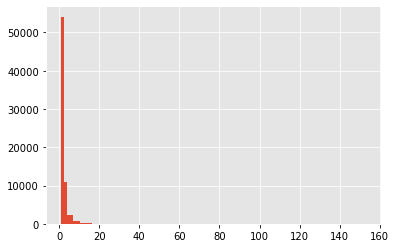

In [25]:
user_count = train.groupBy('userId').count().toPandas()

print('Max Ratings: {}'.format(user_count['count'].max()))
print('Min Ratings: {}'.format(user_count['count'].min()))
user_count['count'].hist(bins = 100)

Max Ratings: 532
Min Ratings: 1


<AxesSubplot:>

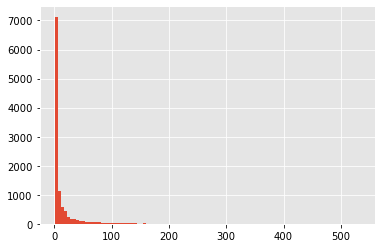

In [26]:
movie_count = train.groupBy('movieId').count().toPandas()

print('Max Ratings: {}'.format(movie_count['count'].max()))
print('Min Ratings: {}'.format(movie_count['count'].min()))
movie_count['count'].hist(bins = 100)

Max Ratings: 36
Min Ratings: 1


<AxesSubplot:>

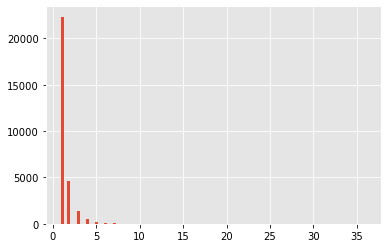

In [27]:
user_count = test.groupBy('userId').count().toPandas()

print('Max Ratings: {}'.format(user_count['count'].max()))
print('Min Ratings: {}'.format(user_count['count'].min()))
user_count['count'].hist(bins = 100)

Max Ratings: 136
Min Ratings: 1


<AxesSubplot:>

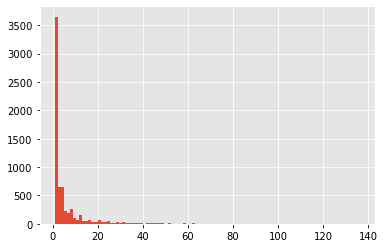

In [28]:
movie_count = test.groupBy('movieId').count().toPandas()

print('Max Ratings: {}'.format(movie_count['count'].max()))
print('Min Ratings: {}'.format(movie_count['count'].min()))
movie_count['count'].hist(bins = 100)

In [29]:
als_model = ALS(userCol='userId',
                itemCol='movieId',
                ratingCol='rating',
                nonnegative=True,
                regParam=0.1,
                rank=10
               )

recommender = als_model.fit(train)

# This kind sample will need to be recreated from a class object that holds user parameters.
The ideal goal is to be able to catalogue distinct user profiles that each hold their information. The goal is to write their profiles to file/database to be able to call them as required.

In [31]:
merged_movie_r_df_sample

,budget,tmdbId,popularity,revenue,vote_average,vote_count,startYear,runtimeMinutes,averageRating,numVotes,gnr_Action,gnr_Adult,gnr_Adventure,gnr_Animation,gnr_Biography,gnr_Comedy,gnr_Crime,gnr_Documentary,gnr_Drama,gnr_Family,gnr_Fantasy,gnr_Film-Noir,gnr_History,gnr_Horror,gnr_Music,gnr_Mystery,gnr_Romance,gnr_Sci-Fi,gnr_Sport,gnr_Thriller,gnr_War,gnr_Western,original_language_en,original_language_hi,original_language_it,original_language_ja,original_language_kl,original_language_lg,original_language_mt,original_language_os,original_language_ps,original_language_st,original_language_sv,original_language_ti,userId,movieId,rating,timeyear
5607343,6000000,629,17.854,23341568,4.10,7649,1995,106.0,4.25,1002628,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,51786,50,5.0,2010
13249347,45000000,8587,105.973,763455561,4.15,13847,1994,88.0,4.25,955828,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,32614,364,5.0,1996
6389845,43000000,711,11.451,80049764,3.60,746,2000,136.0,3.65,83552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,33312,4019,2.0,2001
8339956,6000000,1103,13.550,50244700,3.55,2059,1981,99.0,3.60,128456,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,38662,1129,2.0,2000
14433521,6000000,9377,15.203,70136369,3.80,3473,1986,103.0,3.90,324712,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,156908,2918,3.0,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730780,12000000,14534,7.621,22750363,3.65,421,1993,114.0,3.75,57548,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,123068,524,1.0,2008
19107118,0,12473,11.526,9234510,3.60,284,2007,104.0,3.80,41709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,122450,59018,4.0,2009
13198562,170000000,8487,16.130,222104681,2.65,2499,1999,106.0,2.50,154010,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,142917,2701,4.0,1999
17004514,23000000,10663,11.635,185991646,3.00,1251,1998,90.0,3.10,150451,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,91558,2335,2.5,2005


In [33]:
data = [(51787, 524)]
columns = ('userId', 'movieId')
one_row_spark_df = spark.createDataFrame(data, columns)
one_row_spark_df.show()

+------+-------+
|userId|movieId|
+------+-------+
| 51787|    524|
+------+-------+



In [34]:
user_factor_df = recommender.userFactors.filter('id = 51787')
item_factor_df = recommender.itemFactors.filter('id = 524')

In [35]:
user_factors = user_factor_df.collect()[0]['features']
item_factors = item_factor_df.collect()[0]['features']

In [36]:
np.dot(user_factors, item_factors)

2.0853263979646925

In [37]:
# Get the recommender's prediction
recommender.transform(one_row_spark_df).show()

+------+-------+----------+
|userId|movieId|prediction|
+------+-------+----------+
| 51787|    524| 2.0853262|
+------+-------+----------+



In [38]:
# Get the top movies for a user 1

recommender.recommendForUserSubset(one_row_spark_df, 10).show()

+------+--------------------+
|userId|     recommendations|
+------+--------------------+
| 51787|[[5539, 5.667431]...|
+------+--------------------+



In [39]:
predictions = recommender.transform(test)

In [40]:
predictions.describe().show()

+-------+-------------------+-----------------+------------------+--------------------+-------------------+-----------------+------------------+------------------+------------------+------------------+------------------+---------+-------------------+------------------+-------------------+------------------+-------------------+--------------------+------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+-----------------+------------------+------------------+-----------+
|summary|             budget|

In [41]:
# add the implicit rating column

train = train.withColumn("imp_rating", lit(1))
train.show(5)

+------+------+----------+--------+------------+----------+---------+--------------+-------------+--------+----------+---------+-------------+-------------+-------------+----------+---------+---------------+---------+----------+-----------+-------------+-----------+----------+---------+-----------+-----------+----------+---------+------------+-------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+-------+------+--------+----------+
|budget|tmdbId|popularity| revenue|vote_average|vote_count|startYear|runtimeMinutes|averageRating|numVotes|gnr_Action|gnr_Adult|gnr_Adventure|gnr_Animation|gnr_Biography|gnr_Comedy|gnr_Crime|gnr_Documentary|gnr_Drama|gnr_Family|gnr_Fantasy|gnr_Film-Noir|gnr_History|gnr_Horror|gnr_Music|gnr_Mystery|gnr_Romance|gnr_Sci-Fi|gnr_Sport|gnr_Thri

In [42]:
als_model_imp = ALS(userCol='userId',
                itemCol='movieId',
                ratingCol='imp_rating',
                implicitPrefs=True,
                nonnegative=True,
                regParam=0.1,
                rank=10
               )

recommender_imp = als_model_imp.fit(train)

In [43]:
# Looking at the recommendations for user 1 to compare to what the explicit gave back 
recommender_imp.recommendForUserSubset(one_row_spark_df, 10).collect()

[Row(userId=51787, recommendations=[Row(movieId=380, rating=0.05218157544732094), Row(movieId=608, rating=0.05135456472635269), Row(movieId=592, rating=0.05031957849860191), Row(movieId=4226, rating=0.04447804018855095), Row(movieId=6539, rating=0.038798265159130096), Row(movieId=367, rating=0.03873864561319351), Row(movieId=34, rating=0.030152030289173126), Row(movieId=4973, rating=0.02986348234117031), Row(movieId=2329, rating=0.02514166571199894), Row(movieId=1721, rating=0.024909095838665962)])]

In [45]:
als_model_imp = ALS(userCol='userId',
                itemCol='movieId',
                ratingCol='rating',
                implicitPrefs=True,
                nonnegative=True,
                regParam=0.1,
                rank=10
               )

recommender_imp = als_model_imp.fit(train)

In [46]:
recommender_imp.recommendForUserSubset(one_row_spark_df, 10).collect()

[Row(userId=51787, recommendations=[Row(movieId=858, rating=0.23365215957164764), Row(movieId=1270, rating=0.21481993794441223), Row(movieId=1291, rating=0.17910343408584595), Row(movieId=7361, rating=0.15614359080791473), Row(movieId=293, rating=0.1515250951051712), Row(movieId=1527, rating=0.15096470713615417), Row(movieId=1206, rating=0.14161205291748047), Row(movieId=6874, rating=0.13046056032180786), Row(movieId=736, rating=0.11260436475276947), Row(movieId=1246, rating=0.10880643129348755)])]

In [47]:
# Dump the predictions to Pandas DataFrames to make our final calculations easier
predictions_df = predictions.toPandas()
train_df = train.toPandas()

In [48]:
# Fill any missing values with the mean rating
# There are multiple things you could fill with, this is just one example
predictions_df = predictions.toPandas().fillna(train_df['rating'].mean())

In [49]:
predictions_df['squared_error'] = (predictions_df['rating'] - predictions_df['prediction'])**2

In [50]:
predictions_df.head()

,budget,tmdbId,popularity,revenue,vote_average,vote_count,startYear,runtimeMinutes,averageRating,numVotes,gnr_Action,gnr_Adult,gnr_Adventure,gnr_Animation,gnr_Biography,gnr_Comedy,gnr_Crime,gnr_Documentary,gnr_Drama,gnr_Family,gnr_Fantasy,gnr_Film-Noir,gnr_History,gnr_Horror,gnr_Music,gnr_Mystery,gnr_Romance,gnr_Sci-Fi,gnr_Sport,gnr_Thriller,gnr_War,gnr_Western,original_language_en,original_language_hi,original_language_it,original_language_ja,original_language_kl,original_language_lg,original_language_mt,original_language_os,original_language_ps,original_language_st,original_language_sv,original_language_ti,userId,movieId,rating,timeyear,prediction,squared_error
0,0,4916,10.835,22886222,3.05,63,1993,107.0,2.85,4819,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,40295,463,4.0,2000,2.408803,2.531907
1,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,62935,471,4.0,2004,3.887574,0.012640
2,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,28754,471,2.5,2004,4.526335,4.106035
3,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,10371,471,2.0,2000,3.355827,1.838268
4,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,8123,471,4.5,2003,3.358478,1.303073


In [51]:
predictions_df.describe()

,budget,tmdbId,popularity,revenue,vote_average,vote_count,startYear,runtimeMinutes,averageRating,numVotes,gnr_Action,gnr_Adult,gnr_Adventure,gnr_Animation,gnr_Biography,gnr_Comedy,gnr_Crime,gnr_Documentary,gnr_Drama,gnr_Family,gnr_Fantasy,gnr_Film-Noir,gnr_History,gnr_Horror,gnr_Music,gnr_Mystery,gnr_Romance,gnr_Sci-Fi,gnr_Sport,gnr_Thriller,gnr_War,gnr_Western,original_language_en,original_language_hi,original_language_it,original_language_ja,original_language_kl,original_language_lg,original_language_mt,original_language_os,original_language_ps,original_language_st,original_language_sv,original_language_ti,userId,movieId,rating,timeyear,prediction,squared_error
count,4.009600e+04,40096.000000,40096.000000,4.009600e+04,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,4.009600e+04,40096.000000,40096.0,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,40096.00000,40096.000000,40096.000000,40096.000000,40096.000000,40096.0,40096.0,40096.0,40096.0,40096.0,40096.0,40096.000000,40096.0,40096.000000,40096.000000,40096.000000,40096.000000,40096.000000,4.009600e+04
mean,3.974244e+07,22881.504090,21.598470,1.940961e+08,3.532729,4402.195930,1994.218326,116.146188,3.619679,3.308084e+05,0.292149,0.0,0.270800,0.060230,0.058983,0.349037,0.182088,0.011423,0.490273,0.065842,0.101806,0.004514,0.030178,0.062226,0.035939,0.089261,0.146299,0.126147,0.017757,0.156375,0.021798,0.01040,0.946952,0.000574,0.005811,0.010051,0.0,0.0,0.0,0.0,0.0,0.0,0.001671,0.0,81123.557662,20606.000399,3.534954,2007.967752,2.973876,1.662322e+00
std,4.862595e+07,61962.887295,19.618107,2.730746e+08,0.406425,5108.154358,14.977769,23.675265,0.459565,4.065560e+05,0.454756,0.0,0.444379,0.237916,0.235597,0.476672,0.385922,0.106266,0.499912,0.248009,0.302396,0.067037,0.171078,0.241568,0.186140,0.285123,0.353410,0.332019,0.132070,0.363215,0.146024,0.10145,0.224131,0.023944,0.076009,0.099750,0.0,0.0,0.0,0.0,0.0,0.0,0.040844,0.0,46950.515754,38091.095345,1.060929,7.186361,0.793271,2.347635e+00
min,0.000000e+00,5.000000,0.600000,0.000000e+00,0.000000,0.000000,1915.000000,45.000000,1.000000,5.400000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.000000,1.000000,0.500000,1996.000000,0.028647,1.359246e-08
25%,5.000000e+06,680.000000,10.423000,2.035057e+07,3.250000,737.000000,1989.000000,99.000000,3.350000,6.227800e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,40094.750000,1193.000000,3.000000,2002.000000,2.460493,2.154790e-01
50%,2.200000e+07,6425.000000,14.867000,9.260105e+07,3.550000,2344.000000,1997.000000,113.000000,3.650000,1.787800e+05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,81226.000000,2900.500000,3.500000,2007.000000,3.186160,7.813975e-01
75%,5.700000e+07,11778.000000,24.992000,2.641055e+08,3.800000,6426.000000,2003.000000,128.000000,3.950000,4.308800e+05,1.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,121493.000000,8361.000000,4.000000,2015.000000,3.535803,2.143873e+00
max,3.800000e+08,582607.

In [52]:
# Calculate RMSE
np.sqrt(sum(predictions_df['squared_error']) / len(predictions_df))

1.2893105693888514

In [53]:
predictions_df.head()

,budget,tmdbId,popularity,revenue,vote_average,vote_count,startYear,runtimeMinutes,averageRating,numVotes,gnr_Action,gnr_Adult,gnr_Adventure,gnr_Animation,gnr_Biography,gnr_Comedy,gnr_Crime,gnr_Documentary,gnr_Drama,gnr_Family,gnr_Fantasy,gnr_Film-Noir,gnr_History,gnr_Horror,gnr_Music,gnr_Mystery,gnr_Romance,gnr_Sci-Fi,gnr_Sport,gnr_Thriller,gnr_War,gnr_Western,original_language_en,original_language_hi,original_language_it,original_language_ja,original_language_kl,original_language_lg,original_language_mt,original_language_os,original_language_ps,original_language_st,original_language_sv,original_language_ti,userId,movieId,rating,timeyear,prediction,squared_error
0,0,4916,10.835,22886222,3.05,63,1993,107.0,2.85,4819,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,40295,463,4.0,2000,2.408803,2.531907
1,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,62935,471,4.0,2004,3.887574,0.012640
2,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,28754,471,2.5,2004,4.526335,4.106035
3,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,10371,471,2.0,2000,3.355827,1.838268
4,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,8123,471,4.5,2003,3.358478,1.303073


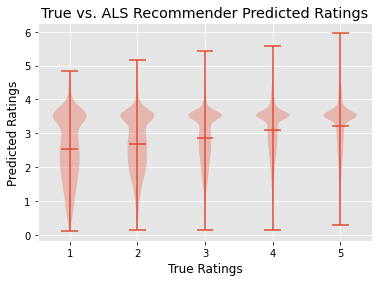

In [54]:

# Create array of predictions for violinplot
data = [predictions_df['prediction'][predictions_df['rating'] == rating].values for rating in range(1, 6)]
plt.violinplot(data, range(1,6), showmeans=True)
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.title('True vs. ALS Recommender Predicted Ratings')
plt.show()

#### Additional Content

In [55]:
def rank_score(df):
    df2 = df.copy()
    df2['rank'] = df2.groupby("userId")["prediction"].rank("dense", ascending=False, na_option='top') -1
    df2 = df2.join(df2.groupby("userId")["rank"].max(), on='userId', rsuffix='_max')
    df2['pct_rank'] = df2['rank']/df2['rank_max']
    
    return np.sum(df2['interactions']*df2['pct_rank'])/np.sum(df2['interactions'])
    

In [56]:
implicit_predictions = recommender_imp.transform(test)

In [57]:
implicit_predictions_df = implicit_predictions.toPandas()

In [58]:
implicit_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40096 entries, 0 to 40095
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                40096 non-null  int64  
 1   tmdbId                40096 non-null  int64  
 2   popularity            40096 non-null  float64
 3   revenue               40096 non-null  int64  
 4   vote_average          40096 non-null  float64
 5   vote_count            40096 non-null  int64  
 6   startYear             40096 non-null  int64  
 7   runtimeMinutes        40096 non-null  float64
 8   averageRating         40096 non-null  float64
 9   numVotes              40096 non-null  int64  
 10  gnr_Action            40096 non-null  float64
 11  gnr_Adult             40096 non-null  float64
 12  gnr_Adventure         40096 non-null  float64
 13  gnr_Animation         40096 non-null  float64
 14  gnr_Biography         40096 non-null  float64
 15  gnr_Comedy         

In [59]:
implicit_predictions_df = implicit_predictions_df.fillna(0)

In [61]:
implicit_predictions_df

,budget,tmdbId,popularity,revenue,vote_average,vote_count,startYear,runtimeMinutes,averageRating,numVotes,gnr_Action,gnr_Adult,gnr_Adventure,gnr_Animation,gnr_Biography,gnr_Comedy,gnr_Crime,gnr_Documentary,gnr_Drama,gnr_Family,gnr_Fantasy,gnr_Film-Noir,gnr_History,gnr_Horror,gnr_Music,gnr_Mystery,gnr_Romance,gnr_Sci-Fi,gnr_Sport,gnr_Thriller,gnr_War,gnr_Western,original_language_en,original_language_hi,original_language_it,original_language_ja,original_language_kl,original_language_lg,original_language_mt,original_language_os,original_language_ps,original_language_st,original_language_sv,original_language_ti,userId,movieId,rating,timeyear,prediction
0,0,4916,10.835,22886222,3.05,63,1993,107.0,2.85,4819,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,40295,463,4.0,2000,0.000038
1,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,62935,471,4.0,2004,0.008952
2,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,28754,471,2.5,2004,0.015481
3,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,10371,471,2.0,2000,0.002170
4,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,8123,471,4.5,2003,0.003019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40091,25000000,41630,21.990,149228077,3.15,3656,2011,108.0,3.10,215854,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,33803,84374,4.0,2011,0.000089
40092,0,33134,5.724,0,3.05,69,2008,96.0,3.25,4801,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,27851,86572,3.5,2017,0.000000
40093,25130430,256040,20.545,90747520,3.75,478,2015,159.0,4.00,104234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,30082,139575,3.0,2015,0.000004
40094,35000000,321741,13.851,50363790,3.55,1986,2015,123.0,3.60,88268,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,75309,145839,5.0,2019,0.000008


In [63]:
# Rename column 'rating' to 'interactions' as that is what we are looking for.
implicit_predictions_df.rename(columns={'rating':'interactions'}, inplace=True)

In [66]:
implicit_predictions_df

,budget,tmdbId,popularity,revenue,vote_average,vote_count,startYear,runtimeMinutes,averageRating,numVotes,gnr_Action,gnr_Adult,gnr_Adventure,gnr_Animation,gnr_Biography,gnr_Comedy,gnr_Crime,gnr_Documentary,gnr_Drama,gnr_Family,gnr_Fantasy,gnr_Film-Noir,gnr_History,gnr_Horror,gnr_Music,gnr_Mystery,gnr_Romance,gnr_Sci-Fi,gnr_Sport,gnr_Thriller,gnr_War,gnr_Western,original_language_en,original_language_hi,original_language_it,original_language_ja,original_language_kl,original_language_lg,original_language_mt,original_language_os,original_language_ps,original_language_st,original_language_sv,original_language_ti,userId,movieId,interactions,timeyear,prediction
0,0,4916,10.835,22886222,3.05,63,1993,107.0,2.85,4819,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,40295,463,4.0,2000,0.000038
1,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,62935,471,4.0,2004,0.008952
2,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,28754,471,2.5,2004,0.015481
3,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,10371,471,2.0,2000,0.002170
4,25000000,11934,10.682,2800000,3.55,697,1994,111.0,3.60,77498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,8123,471,4.5,2003,0.003019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40091,25000000,41630,21.990,149228077,3.15,3656,2011,108.0,3.10,215854,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,33803,84374,4.0,2011,0.000089
40092,0,33134,5.724,0,3.05,69,2008,96.0,3.25,4801,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,27851,86572,3.5,2017,0.000000
40093,25130430,256040,20.545,90747520,3.75,478,2015,159.0,4.00,104234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,30082,139575,3.0,2015,0.000004
40094,35000000,321741,13.851,50363790,3.55,1986,2015,123.0,3.60,88268,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,75309,145839,5.0,2019,0.000008


In [65]:
rank_score(implicit_predictions_df)

0.18875629157664608

# User Account Management
## Main Function Objects
### Data written to file
#### The user record
This data is to be initialized by the user, with a minimum of a single item's key values. This creates a record to be saved to file. This record will be loaded in every time the user "signs in", which means loads their saved record. This record is instantiated into the class, where its methods enable adding/deleting items, and using the recommender to find more items.
#### Record Item Searching and declaration
Using a variety of searching (some based on regex), the user can locate items to add to their profile. At minimum is searching via title, but the more methods available the better. The user should be able to search by genre, name, and potentially weighted tags. This is to be created on availability of time. MVP: title
#### Record completion and imputation
As the user finds items through searching, ensure all fields saved to the user are functional.
### Recommender
#### Recommendation Search
The recommender will be called upon the moment the user class executes the function method to load all its item data into the model. Thus the user will receive a prediction based on their total complete record.
#### Archiving the result
Present the user with the choice to save items which are recommended. These will be added to their profile, thus increasing their unique data.
# User Interface and Display
## Basic display linking
For the next part of the project, the user should have comfortable display. Movie title and summary information is minimum, but additional data can be used to show descriptions, tags, keywords, and movie poster art. Many of these fields are often found NULL in their source data, and as such error handling and data processing must be present to ensure the query returns all required UI items without breaking functionality. In case of constraint toggle a simple mode to ensure verbose content can be skipped.

# Data Concept: MetaUser
## Overall dataset compression and feature weighting
By taking an average result of all users per bucket of rating range of a movie within 1.0 (0 to 1, 1 to 2, 2 to 3, etc), a MetaUser can be created.
The score bucket becomes its own kind of user record, and all values of continuous float and dummy binary 0/1 become an average. This reduces data within the prediction model structure, which could potentially increase the speed of predictions. The premise: some people are very similar to others.

## A user record with multiple items saved can form a MetaUser
As a user collects movies and rates them, this item's user data can easily be matched to a MetaUser. This results in a quick prediction.